### Actividad de perceptrón y perceptrón multicapa
#### Autor: Francisco Serradilla

Tareas:

- Escribir el código de propagación y actualización de pesos del perceptrón.
- Escribir el código de propagación y actualización de pesos del perceptrón multicapa para una capa oculta.
- Encontrar arquitecturas mínimas para el problema no lineal y el problema de clasificación de orquídeas.
- Ampliar el código del perceptrón Multicapa para calcular el error de test a partir de otro conjunto de datos.
- Probar entrenamiento y cálculo del error de test con el juego de datos de aprobados.
- (hacer al menos dos) Probar con problemas adicionales (circulo, fun, morosos, quinielas). Al final hay una explicación de los conjuntos de datos suministrados.
- (opcional) Añadir una segunda capa oculta al perceptrón multacapa y/o un múmero indefinido de capas.

# ---> **CLASE PERCEPTRÓN** <---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class Perceptron:
    def __init__(self, ninput, noutput):
        self.ninput = ninput
        self.noutput = noutput
        self.w = np.random.rand(ninput,noutput)-0.5
        self.b = np.random.rand(noutput)-0.5
        
    def forward (self, x): # propaga un vector x y devuelve la salida
        sumaPonderada = np.dot(x, self.w) + self.b # Método dot. Primero x(inputs) que tiene de dimensión 1x2 y luego los pesos de dimensión 2x1. Al final se suma el bias.
        return np.where(sumaPonderada > 0, 1, 0)
        
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        s = self.forward(x) # propaga
        
        # calcula actualización de pesos para una entrada x
        self.b += alpha * (d-s)
        self.w += alpha* np.transpose([x]) * (d-s) # Transpongo x porque es dimensión 1x2, mientras que w(eights) es 2x1
        
    def RMS (self, X, D): # calcula el error RMS
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula el ratio de aciertos
        S = self.forward(X)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # traza de cómno va el entrenamiento
        print('     RMS: %6.5f' % self.RMS(X,D))
        print('Accuracy: %6.5f' % self.accuracy(X,D))
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)
    
    def plot_neural_network(self,tittle):
        G = nx.DiGraph()

        #nodos
        for i in range(self.ninput):
            G.add_node(f'Input {i + 1}')

        for i in range(self.noutput):
            G.add_node(f'Output {i + 1}')

        #conexiones con pesos
        for i in range(self.ninput):
            for j in range(self.noutput):
                weight = self.w[i, j]
                G.add_edge(f'Input {i + 1}', f'Output {j + 1}', weight=weight)
                
        pos = {**{f'Input {i + 1}': (0, -i) for i in range(self.ninput)}, **{f'Output {i + 1}': (1, -i) for i in range(self.noutput)}}
        weights = [G[u][v]['weight'] for u, v in G.edges]

        nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_color='black', font_weight='bold', edge_color=weights, edge_cmap=plt.cm.Blues, width=2, edge_vmin=-1, edge_vmax=1)

        #peso conexión
        edge_labels = {(f'Input {i + 1}', f'Output {j + 1}'): round(self.w[i, j], 2) for i in range(self.ninput) for j in range(self.noutput)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

        plt.title(tittle)
        plt.show()


# ---> **PROBLEMA DE LA OR** <---

In [3]:
p = Perceptron(2,1)

# OR
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [1.0]])

p.info
p.train(data, labels, 0.01, 50, 10)


   Epoch: 10
     RMS: 0.50000
Accuracy: 0.50000

   Epoch: 20
     RMS: 0.50000
Accuracy: 0.50000

   Epoch: 30
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 40
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 50
     RMS: 0.00000
Accuracy: 1.00000


# ---> **VISUALIZACIÓN PERCEPTRÓN** <---

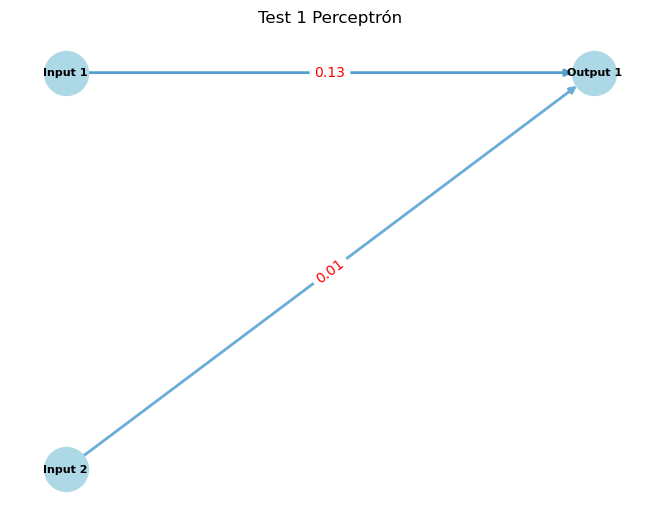

In [5]:
p.plot_neural_network('Test 1 Perceptrón')

# ---> **CLASE MULTILAYER** <---

In [26]:
import numpy as np
class Multilayer:
    def __init__(self, ninput, nhidden, noutput):
        self.ninput = ninput # número de entradas
        self.nhidden = nhidden # número de neuronas en capa oculta
        self.noutput = noutput # número de salidas

        self.w1 = np.random.rand(ninput,nhidden)-0.5
        self.b1 = np.random.rand(nhidden)-0.5
        self.w2 = np.random.rand(nhidden,noutput)-0.5
        self.b2 = np.random.rand(noutput)-0.5
        
        self.lRMS = [] # contiene la lista de RMSs para pintarlos luego
        self.laccuracy = [] # contiene la lista de accuracy para pintar luego

    def sigm (self, neta): # función sigmoidal
        return 1.0 / (1.0 + np.exp(-neta))
    
    def forward (self, x): # propaga un vector x y devuelve la salida
        netSumHidden = np.dot(x, self.w1) + self.b1 # Metodo dot. Primero x(inputs) que tiene de dimensión 1x2 y luego los pesos de dimensión 2x1. Al final se suma el bias.
        self.netSumHiddenSigm = self.sigm(netSumHidden)
        netSumOutput = np.dot(self.netSumHiddenSigm, self.w2) + self.b2
        self.netSumOutputSigm = self.sigm(netSumOutput)

        return self.netSumOutputSigm
    
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        # NOTA: Los aleatorios influyen muchísimo 
        # En si se estanca en una meseta o no.

        output = self.forward(x)
        
        delta_output_hidden = (d - output) * output * (1 - output)
        delta_hidden_input = np.dot(self.w2, delta_output_hidden) * self.netSumHiddenSigm * (1 - self.netSumHiddenSigm)
        
        self.w2 += alpha * np.outer(delta_output_hidden, self.netSumHiddenSigm).T
        self.b2 += alpha * delta_output_hidden
        
        self.w1 += alpha * np.outer(delta_hidden_input, x).T
        self.b1 += alpha * delta_hidden_input

    def test(self, X_test, L_test):
        aux = 0
        outputAll = []
        for i in range(len(L_test)):
            salida = p.forward(X_test[i])
            outputAll.append(np.argmax(salida))
            if int(np.argmax(salida))==int(L_test[i]): # acierto con la salida
                aux+=1
        return aux/len(L_test), self.test_loss(np.array(outputAll), np.array(L_test))

    def test_loss(self,salida,expected):
        return np.sqrt(np.mean(np.square(abs(expected.astype(int)-salida))))

    def RMS (self, X, D): # error RMS
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula ratio de aciertos
        S = self.forward(X)
        S = np.round(S)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # escribe traza
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy

        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)

    #---------------------------------------------------           
    def plot_neural_network(self, title):
        G = nx.DiGraph()

        #nodos
        for i in range(self.ninput):
            G.add_node(f'Input {i + 1}')

        for i in range(self.nhidden):
            G.add_node(f'Hidden {i + 1}')

        for i in range(self.noutput):
            G.add_node(f'Output {i + 1}')

        #conexiones con pesos
        for i in range(self.ninput):
            for j in range(self.nhidden):
                weight = self.w1[i, j]
                G.add_edge(f'Input {i + 1}', f'Hidden {j + 1}', weight=weight)

        for i in range(self.nhidden):
            for j in range(self.noutput):
                weight = self.w2[i, j]
                G.add_edge(f'Hidden {i + 1}', f'Output {j + 1}', weight=weight)

        # Dibuja red
        input_nodes = [f'Input {i + 1}' for i in range(self.ninput)]
        hidden_nodes = [f'Hidden {i + 1}' for i in range(self.nhidden)]
        output_nodes = [f'Output {i + 1}' for i in range(self.noutput)]

        pos = {
            **{n: (0, -i) for i, n in enumerate(input_nodes)},
            **{n: (1, -i) for i, n in enumerate(hidden_nodes)},
            **{n: (2, -i) for i, n in enumerate(output_nodes)}
        }
        weights = [G[u][v]['weight'] for u, v in G.edges]

        nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_color='black', font_weight='bold', edge_color=weights, edge_cmap=plt.cm.RdYlBu, width=2)

        # peso 
        edge_labels = {(f'Input {i + 1}', f'Hidden {j + 1}'): round(self.w1[i, j], 2) for i in range(self.ninput) for j in range(self.nhidden)}
        edge_labels.update({(f'Hidden {i + 1}', f'Output {j + 1}'): round(self.w2[i, j], 2) for i in range(self.nhidden) for j in range(self.noutput)})

        # ajuste
        all_nodes = set(pos.keys())
        all_nodes.update(edge_labels.keys())
        pos_labels = {node: pos.get(node, (0, 0)) for node in all_nodes}

        nx.draw_networkx_edge_labels(G, pos_labels, edge_labels=edge_labels, font_color='red')
        plt.title(title)
        plt.show()
    #---------------------------------------------------

def one_hot (d): # codificación one_hot
    num_classes = len(set(d))
    rows = d.shape[0]
    labels = np.zeros((rows, num_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

# ---> **PROBLEMA DE LA XOR** <---

In [9]:
# XOR
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [0.0]])

p = Multilayer(2,2,1)

p.info(data, labels)
p.train(data, labels, 0.8, 5000, 1000)

     RMS: 0.50006
Accuracy: 0.50000

   Epoch: 1000
     RMS: 0.11135
Accuracy: 1.00000

   Epoch: 2000
     RMS: 0.04058
Accuracy: 1.00000

   Epoch: 3000
     RMS: 0.02896
Accuracy: 1.00000

   Epoch: 4000
     RMS: 0.02359
Accuracy: 1.00000

   Epoch: 5000
     RMS: 0.02035
Accuracy: 1.00000


# ---> **VISUALIZACIÓN DEL MULTILAYER** <---

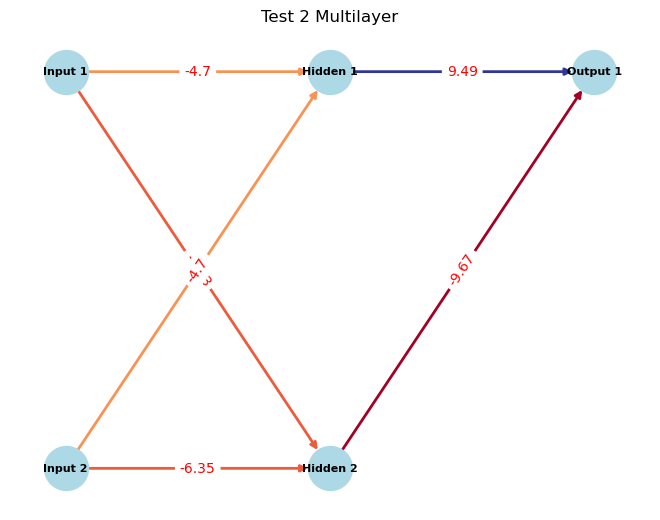

In [10]:
p.plot_neural_network('Test 2 Multilayer')

# ---> **REGIONES LINEALES** <---

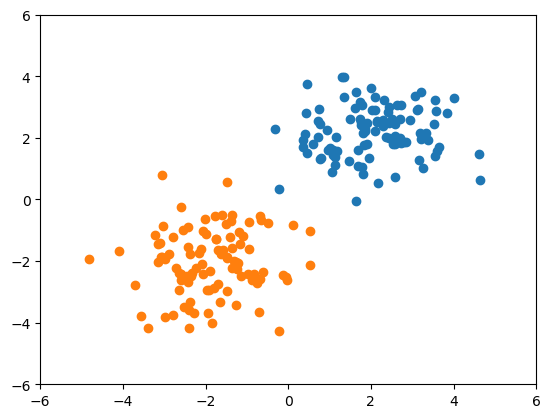


   Epoch: 1
     RMS: 0.01000
Accuracy: 0.99000

   Epoch: 2
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 3
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 4
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 5
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 6
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 7
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 8
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 9
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 10
     RMS: 0.00000
Accuracy: 1.00000


In [12]:
# example data from two classes; 2D normal distributions
num = 100
x0 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
d0 = np.repeat(0, num)
x1 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
d1 = np.repeat(1, num)

plt.xlim(-6,6)
plt.ylim(-6,6)
plt.plot(x0[:,0],x0[:,1],'o')
plt.plot(x1[:,0],x1[:,1],'o')

plt.show()

X = np.vstack((x0,x1))
d = np.hstack((d0,d1))
d.shape = (200,1) # convierte el vector en un array

p = Perceptron(2,1)

p.train(X, d, 0.01, 10, 1)

# ---> **REGIONES NO LINEALES** <---

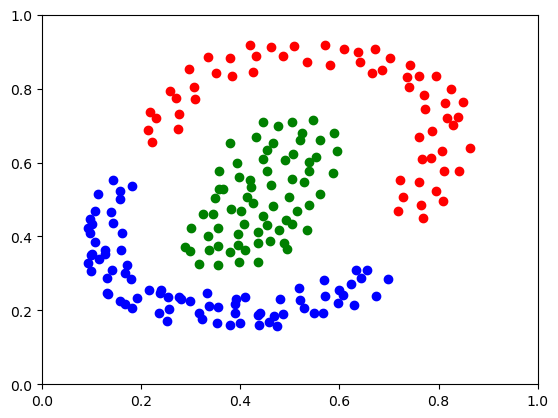


   Epoch: 1000
     RMS: 0.04775
Accuracy: 1.00000

   Epoch: 2000
     RMS: 0.02787
Accuracy: 1.00000

   Epoch: 3000
     RMS: 0.02131
Accuracy: 1.00000

   Epoch: 4000
     RMS: 0.01782
Accuracy: 1.00000

   Epoch: 5000
     RMS: 0.01558
Accuracy: 1.00000


In [13]:
# regiones no lineales

X = np.loadtxt('samples/data_3classes_nonlinear_2D.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)

p = Multilayer(ni,15,no)
p.train(data, labels, 0.8, 5000, 1000)

# ---> **ORQUÍDEAS CON ARQUITECTURA MÍNIMA** <---

In [15]:
# Orquideas
X = np.loadtxt('samples/iris.csv', dtype = 'float64', usecols = [0,1,2,3])
L = np.loadtxt('samples/iris.csv', dtype = str, usecols = [4]) 

# convierte la salida a enteros
d = []
options = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

# Arquitectura mínima encontrada que aprende este problema
p = Multilayer(ni,2,no)

p.train(X, d, 0.01, 1000, 100)


   Epoch: 100
     RMS: 0.47155
Accuracy: 0.66667

   Epoch: 200
     RMS: 0.36903
Accuracy: 0.77778

   Epoch: 300
     RMS: 0.31678
Accuracy: 0.83778

   Epoch: 400
     RMS: 0.30064
Accuracy: 0.83556

   Epoch: 500
     RMS: 0.28449
Accuracy: 0.82667

   Epoch: 600
     RMS: 0.23145
Accuracy: 0.90444

   Epoch: 700
     RMS: 0.17628
Accuracy: 0.95778

   Epoch: 800
     RMS: 0.14349
Accuracy: 0.96889

   Epoch: 900
     RMS: 0.12357
Accuracy: 0.97333

   Epoch: 1000
     RMS: 0.11027
Accuracy: 0.97778


# ---> **EXPLICACIÓN DATASETS** <---

### Explicación de los archivos de datos suministrados

#### Aprobados

Contiene 3 entradas, correspondiente a la nota en 3 ejercicios, y 1 salida, que indica si el alumno aprobó o no. Se trataría de predecir si un alumno va a aprobar a partir de sus notas. Es un problema de clasificación.

Cuestiones: ¿Es un problema lineal? ¿Puede aprenderla una red de neuronas?
Res: Sí, es un problema lineal pues existirá un hiperplano que sea capaz de separar adecuadamente aquellos que aprueban y los que no y una red de neuronas muy simple debería ser capaz de clasificar adecuadamente a los alumnos.

    |      /    
    |     /*
    |    /     *
    | * /     *
    |  /   *    °
    | / °     °   °
    |/____°_________




#### Fun

Contiene 1 entrada y 1 salida, que son la *x* y la *y* de una función desconocida. Es un problema de ajuste o regresión.

Cuestiones: ¿Es una función lineal? ¿Puede aprenderla una red de neuronas? ¿Puede decirnos la red qué función es?

#### Morosos

Contiene datos de mnorosidad de un banco. La idea es predecir si un nuevo cliente va a devolver un prestamo o no y utilizar esta predicción para concederle o denegarle el préstamo. Es un problema de clasificación.

Tiene 9 entradas y 1 salida.

Cuestiones: ¿Es una función lineal? ¿Cuál es el porcentaje de acierto estimado en test?

#### Quinielas

Contiene datos de quinielas deportivas. Tiene 60 entradas y 3 salidas (1, X, 2). Es un problema de clasificación.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Sensores

Contiene datos de sensores y velocidades medias en la M-40. La idea es ver si se puede predecir la velocidad media en un punto que no tiene sensor a partir de las lecturas de los sensores en otros puntos. Es un problema de ajuste o regresión.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Circulo

Es un problema de clasificación con 3 regiones concéntricas. No tiene conjunto de test, el objetivo es encontrar la red mínima que pueda clasificar correctamente todos los ejemplos.

#### Encoder

Es el problema clásico de utilizar una capa oculta para codificar patrones de 8 valores en una dimensión menor. El objetivo es entrenar un perceptrón 8-3-8 para que aprenda esta codificación en el 100% de los ejemplos.  Es un problema de clasificación.

#### Pima-diabetes

Contiene resultados de un conjunto de análisis y pruebas en personas que posteriormente desarrollaron o no diabetes. La idea es ver si se puede predecir si una persona va a desarrollar la enfermedad en el futuro.

En este caso hay que separar aleatoriamente un 30% de ejemplos para tener una conjunto de test. Nota: se sugiere usar la función shuffle.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

# ---> **DATASET APROBADOS MULTILAYER** <---

In [16]:
X = np.loadtxt('samples/aprobado-ent.txt', dtype = 'float64', usecols = [0,1,2])
L = np.loadtxt('samples/aprobado-ent.txt', dtype = str, usecols = [3]) 

X_test = np.loadtxt('samples/aprobado-tst.txt', dtype = 'float64', usecols = [0,1,2])
L_test = np.loadtxt('samples/aprobado-tst.txt', dtype = str, usecols = [3]) 

# convierte la salida a enteros
d = []
options = ['0', '1']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

p = Multilayer(ni,2,no) 
p.train(X, d, 0.01, 1000, 100)


   Epoch: 100
     RMS: 0.47948
Accuracy: 0.73469

   Epoch: 200
     RMS: 0.44494
Accuracy: 0.76531

   Epoch: 300
     RMS: 0.40461
Accuracy: 0.87755

   Epoch: 400
     RMS: 0.35902
Accuracy: 0.95918

   Epoch: 500
     RMS: 0.31182
Accuracy: 0.95918

   Epoch: 600
     RMS: 0.26044
Accuracy: 0.97959

   Epoch: 700
     RMS: 0.22197
Accuracy: 0.97959

   Epoch: 800
     RMS: 0.19318
Accuracy: 0.97959

   Epoch: 900
     RMS: 0.17142
Accuracy: 0.97959

   Epoch: 1000
     RMS: 0.15460
Accuracy: 0.97959


In [17]:
acc, loss = p.test(X_test,L_test)

print("----*"*8)
print("Test Accuracy: ", round(acc, 5))
print("Test Error: ",loss)
print("----*"*8)
    

----*----*----*----*----*----*----*----*
Test Accuracy:  0.93878
Test Error:  0.24743582965269675
----*----*----*----*----*----*----*----*


# ---> **DATASET DIABETES MULTILAYER** <---

In [19]:
# Load the dataset
from random import shuffle
data = np.loadtxt('samples/pima-diabetes.csv', delimiter=',', dtype=float)
shuffle(data)
X = data[:, :-1]
L = data[:, -1]

def getPercentage(X, L, percentage):
    num = round(len(X) * percentage)
    return X[:num, :], L[:num], X[num:, :], L[num:]

X_train, L_train, X_test, L_test = getPercentage(X, L, 0.7)

# Convert the labels to integers
d_train = [int(float(label)) for label in L_train]
d_test = [int(float(label)) for label in L_test]

d_train_one_hot = one_hot(np.array(d_train))
d_test_one_hot = one_hot(np.array(d_test))

L_train = L_train.astype(int)
L_test = L_test.astype(int).reshape(len(L_test), 1)

ni = X.shape[1]
no = len(options)

p = Multilayer(ni,64,no)
p.train(X_test, d_test_one_hot, 0.001, 10000, 1000)


   Epoch: 1000
     RMS: 0.29155
Accuracy: 0.84565

   Epoch: 2000
     RMS: 0.25249
Accuracy: 0.88913

   Epoch: 3000
     RMS: 0.21925
Accuracy: 0.92391

   Epoch: 4000
     RMS: 0.19917
Accuracy: 0.91739

   Epoch: 5000
     RMS: 0.18177
Accuracy: 0.94348

   Epoch: 6000
     RMS: 0.16844
Accuracy: 0.95000

   Epoch: 7000
     RMS: 0.15796
Accuracy: 0.95435

   Epoch: 8000
     RMS: 0.15007
Accuracy: 0.95652

   Epoch: 9000
     RMS: 0.14274
Accuracy: 0.96087

   Epoch: 10000
     RMS: 0.13723
Accuracy: 0.96087


# ---> **DATASET MOROSOS MULTILAYER** <---

In [22]:
X = np.loadtxt('samples/morosos-ent.txt', dtype = 'float64', usecols = [0,1,2,3,4,5,6,7,8])
L = np.loadtxt('samples/morosos-ent.txt', dtype = str, usecols = [9]) 

X_test = np.loadtxt('samples/morosos-tst.txt', dtype = 'float64', usecols = [0,1,2,3,4,5,6,7,8])
L_test = np.loadtxt('samples/morosos-tst.txt', dtype = str, usecols = [9]) 

d = []
options = ['0.0', '1.0']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

p = Multilayer(ni,32,no)
p.train(X, d, 0.01, 1000, 200)


   Epoch: 200
     RMS: 0.31357
Accuracy: 0.79986

   Epoch: 400
     RMS: 0.29208
Accuracy: 0.80665

   Epoch: 600
     RMS: 0.28317
Accuracy: 0.81886

   Epoch: 800
     RMS: 0.27536
Accuracy: 0.82632

   Epoch: 1000
     RMS: 0.26719
Accuracy: 0.83107


# ---> **MULTILAYER N CAPAS** <---

In [23]:
import numpy as np
# multicapa = Multilayer(nipunts, [10,20,30], nooutputs)

class MultilayerN:
    def __init__(self, ninput, nhidden, noutput):
        self.ninput = ninput # número de entradas
        self.nhidden = nhidden # Lista con las neuronas de cada capa oculta
        self.noutput = noutput # número de salidas
        #   inputs -> 10 n -> 20 -> 30 -> salida

        w0 =  np.random.rand(ninput,nhidden[0])-0.5
        wLast = np.random.rand(nhidden[-1],noutput)-0.5

        self.weights = [np.random.rand(nhidden[x], nhidden[x+1])-0.5 for x in range(len(nhidden)-1)]
        self.weights.insert(0, w0)
        self.weights.append(wLast)

        self.biases = [np.random.rand(nhidden[x])-0.5 for x in range(len(nhidden))]
        self.biases.append(np.random.rand(noutput)-0.5)
    
        self.lRMS = [] # contiene la lista de RMSs para pintarlos luego
        self.laccuracy = [] # contiene la lista de accuracy para pintar luego

    def sigm (self, neta): # función sigmoidal
        return 1.0 / (1.0 + np.exp(-neta))
    
    def forward (self, x): # propaga un vector x y devuelve la salida
            
        self.activaciones = []
        for i in range(len(self.nhidden)+1):
            netSumHidden = 0
            if i == 0:
                netSumHidden = np.dot(x, self.weights[0]) + self.biases[0]
                self.activaciones.append(self.sigm(netSumHidden))
                continue
            netSumHidden = np.dot(self.activaciones[i-1], self.weights[i]) + self.biases[i]
            self.activaciones.append(self.sigm(netSumHidden))
                
        return self.activaciones[-1]
    
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        output = self.forward(x)
        deltas = []

        for i in range(len(self.activaciones), 0, -1):
            if i == len(self.activaciones):
                delta = (d-output) * output * (1-output)
            else:
                delta = np.dot(self.weights[i], deltas[-1]) * self.activaciones[i-1] * (1 - self.activaciones[i-1])
            deltas.append(delta)

        deltas = list(reversed(deltas))

        for i in range(len(self.activaciones)):
            if i == 0:
                self.weights[i] += alpha * np.outer(deltas[i], x).T
            else:
                self.weights[i] += alpha * np.outer(deltas[i], self.activaciones[i-1]).T
            self.biases[i] += alpha * deltas[i]

    def RMS (self, X, D): # error RMS
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula ratio de4 aciertos
        S = self.forward(X)
        S = np.round(S)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # escribe traza
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy

        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)
                
def one_hot (d): # codificación one_hot
    num_classes = len(set(d))
    rows = d.shape[0]
    labels = np.zeros((rows, num_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

# ---> **ORQUÍDEAS MULTILAYER N CAPAS** <---

In [24]:
X = np.loadtxt('samples/iris.csv', dtype = 'float64', usecols = [0,1,2,3])
L = np.loadtxt('samples/iris.csv', dtype = str, usecols = [4]) 

d = []
options = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

p = MultilayerN(ni,[16,64,32], no)
p.train(X, d, 0.01, 1000, 100)


   Epoch: 100
     RMS: 0.32307
Accuracy: 0.79778

   Epoch: 200
     RMS: 0.25495
Accuracy: 0.85111

   Epoch: 300
     RMS: 0.14434
Accuracy: 0.95556

   Epoch: 400
     RMS: 0.09571
Accuracy: 0.97333

   Epoch: 500
     RMS: 0.07545
Accuracy: 0.97333

   Epoch: 600
     RMS: 0.06457
Accuracy: 0.97556

   Epoch: 700
     RMS: 0.05785
Accuracy: 0.97333

   Epoch: 800
     RMS: 0.05334
Accuracy: 0.97556

   Epoch: 900
     RMS: 0.05010
Accuracy: 0.97778

   Epoch: 1000
     RMS: 0.04764
Accuracy: 0.97778
